In [10]:
'''
The growing rate of diabets 



'''

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [11]:
diabetes = pd.read_csv('/Users/mac/Downloads/diabetes.csv')

In [12]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
print('dimension of diabetes data : {}'.format(diabetes.shape))

dimension of diabetes data : (768, 9)


In [14]:
''' 
Outcome is the target column. 
Considering 0 is the negative and 1 is positive
500 negative and 268 positive out of the total 
'''
print(diabetes.groupby('Outcome').size())

Outcome
0    500
1    268
dtype: int64


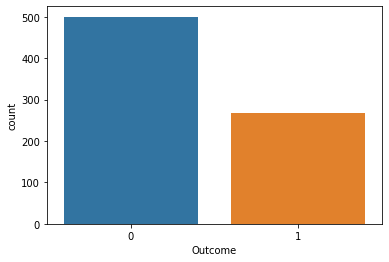

In [15]:
import seaborn as sns 
sns.countplot(diabetes['Outcome'],label = 'Count')

In [16]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


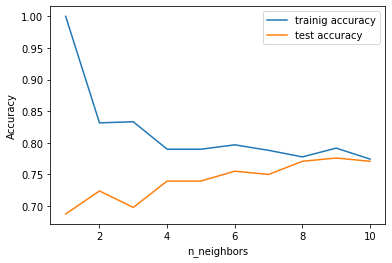

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(diabetes.loc[:,diabetes.columns != 'Outcome'],diabetes['Outcome'],stratify=diabetes['Outcome'],random_state=66)
from sklearn.neighbors import KNeighborsClassifier 
training_accuracy =[]
test_accuracy = []
#try n_neighbors from 1to 10 
neighbors_settings =range(1,11)
for n_neighbors in neighbors_settings:
    #building model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train,y_train)
    #record training set accuracy 
    training_accuracy.append(knn.score(X_train,y_train))
    #record test set accuracy
    test_accuracy.append(knn.score(X_test,y_test))
plt.plot(neighbors_settings, training_accuracy, label ='trainig accuracy')
plt.plot(neighbors_settings,test_accuracy,label='test accuracy')
plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')
plt.legend()

In [19]:
#Now we check the accuracy score of the k-nearest neighbors algorithm to predict diabetes
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train,y_train)
print("Accuracy of KNN classifier on training set: {:.2f}".format (knn.score(X_train,y_train)))
print("Accuracy of KNN classifeir on test set: {:.2f}".format(knn.score(X_test,y_test)))


Accuracy of KNN classifier on training set: 0.79
Accuracy of KNN classifeir on test set: 0.78


# Decision Tree Classifier 

In [20]:
from sklearn.tree import DecisionTreeClassifier 
tree= DecisionTreeClassifier(random_state=0)
tree.fit(X_train,y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train,y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test,y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.714


In [ ]:
'''
Since training set is 100% and test is less we see overfitting 
Now we need to apply pre-prunning to the tree.
To do this we will set the max_depth of the tree
It will reduce accuracy on training setb but improve on test set.
'''

In [22]:
tree = DecisionTreeClassifier(max_depth=3, random_state=0)
tree.fit(X_train,y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train,y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test,y_test)))

Accuracy on training set: 0.773
Accuracy on test set: 0.740


## Feature Importance in Decsion Trees

In [24]:
'''
feature importance shows how importance a feature is to the decision
0 means its useless and 1 means it perfectly predicts the target
feature importance always sum to 1 
'''
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[0.04554275 0.6830362  0.         0.         0.         0.27142106
 0.         0.        ]


In [33]:
'''# Visualize 
def plot_feature_importances_diabetes(model):
    plt.figure(figsize=(8,6))
    n_features = 8
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), diabetes_features)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
plot_feature_importances_diabetes(tree)
'''

'# Visualize \ndef plot_feature_importances_diabetes(model):\n    plt.figure(figsize=(8,6))\n    n_features = 8\n    plt.barh(range(n_features), model.feature_importances_, align=\'center\')\n    plt.yticks(np.arange(n_features), diabetes_features)\n    plt.xlabel("Feature importance")\n    plt.ylabel("Feature")\n    plt.ylim(-1, n_features)\nplot_feature_importances_diabetes(tree)\n'

In [34]:
#plot_feature_importances_diabetes(tree)

# Let's use deep learning to predict 

In [36]:
from sklearn.neural_network import MLPClassifier 
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train,y_train)
print("Accuracy on training set: {:.2f}".format(mlp.score(X_train,y_train)))
print("Accuracy on test set : {:.2f}".format(mlp.score(X_test,y_test)))


Accuracy on training set: 0.73
Accuracy on test set : 0.72


In [37]:
'''
The accuracy of the multilayer perceptrons is not as good as the other models
deep learning algorithms expect input features to vary in a similar way and have a mean of 0 and variance of 1 
let's rescale the data to fulfill this condition and then see what happens 
'''

"\nThe accuracy of the multilayer perceptrons is not as good as the other models\ndeep learning algorithms expect input features to vary in a similar way and have a mean of 0 and variance of 1 \nlet's rescale the data to fulfill this condition and then see what happens \n"

In [38]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
mlp=MLPClassifier(random_state=0)
mlp.fit(X_train_scaled,y_train)
print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.823
Accuracy on test set: 0.802


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [39]:
#Tune hyperparameters
mlp=MLPClassifier(max_iter=1000,alpha=1,random_state=0)
mlp.fit(X_train_scaled,y_train)
print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.806
Accuracy on test set: 0.797
